
# <span style="color:rgb(213,80,0)">Robust monitoring of time series</span>

This file creates Figures 8.30\-8.32.

## Beginning of code

In [1]:
close all; clear;
rng(12345);

## load data

In [2]:
% airline data
airlines = ...
    [112  115  145  171  196  204  242  284  315  340  360  417    % Jan
    118  126  150  180  196  188  233  277  301  318  342  391    % Feb
    132  141  178  193  236  235  267  317  356  362  406  419    % Mar
    129  135  163  181  235  227  269  313  348  348  396  461    % Apr
    121  125  172  183  229  234  270  318  355  363  420  472    % May
    135  149  178  218  243  264  315  374  422  435  472  535    % Jun
    148  170  199  230  264  302  364  413  465  491  548  622    % Jul
    148  170  199  242  272  293  347  405  467  505  559  606    % Aug
    136  158  184  209  237  259  312  355  404  404  463  508    % Sep
    119  133  162  191  211  229  274  306  347  359  407  461    % Oct
    104  114  146  172  180  203  237  271  305  310  362  390    % Nov
    118  140  166  194  201  229  278  306  336  337  405  432 ]; % Dec
airlines=(airlines(:));

## Preapre input for Figure 8.30

Plot cap8fig/ch8\_ts\_airline and cap8fig/ch8\_ts\_airline\_LScont


In [3]:
% select the airline data
userdata = 1;

% contaminate the data as done in the book
airlinesLS=airlines;
LSpos = 80; UPpos = 35; DOWNpos = 100:105;
airlinesLS(LSpos:end)=airlinesLS(LSpos:end)+130;
airlinesLS(DOWNpos)=airlinesLS(DOWNpos)-200;
airlinesLS(UPpos)=airlinesLS(UPpos)+200;

## Create left panel of Figure 8.30

figure generation



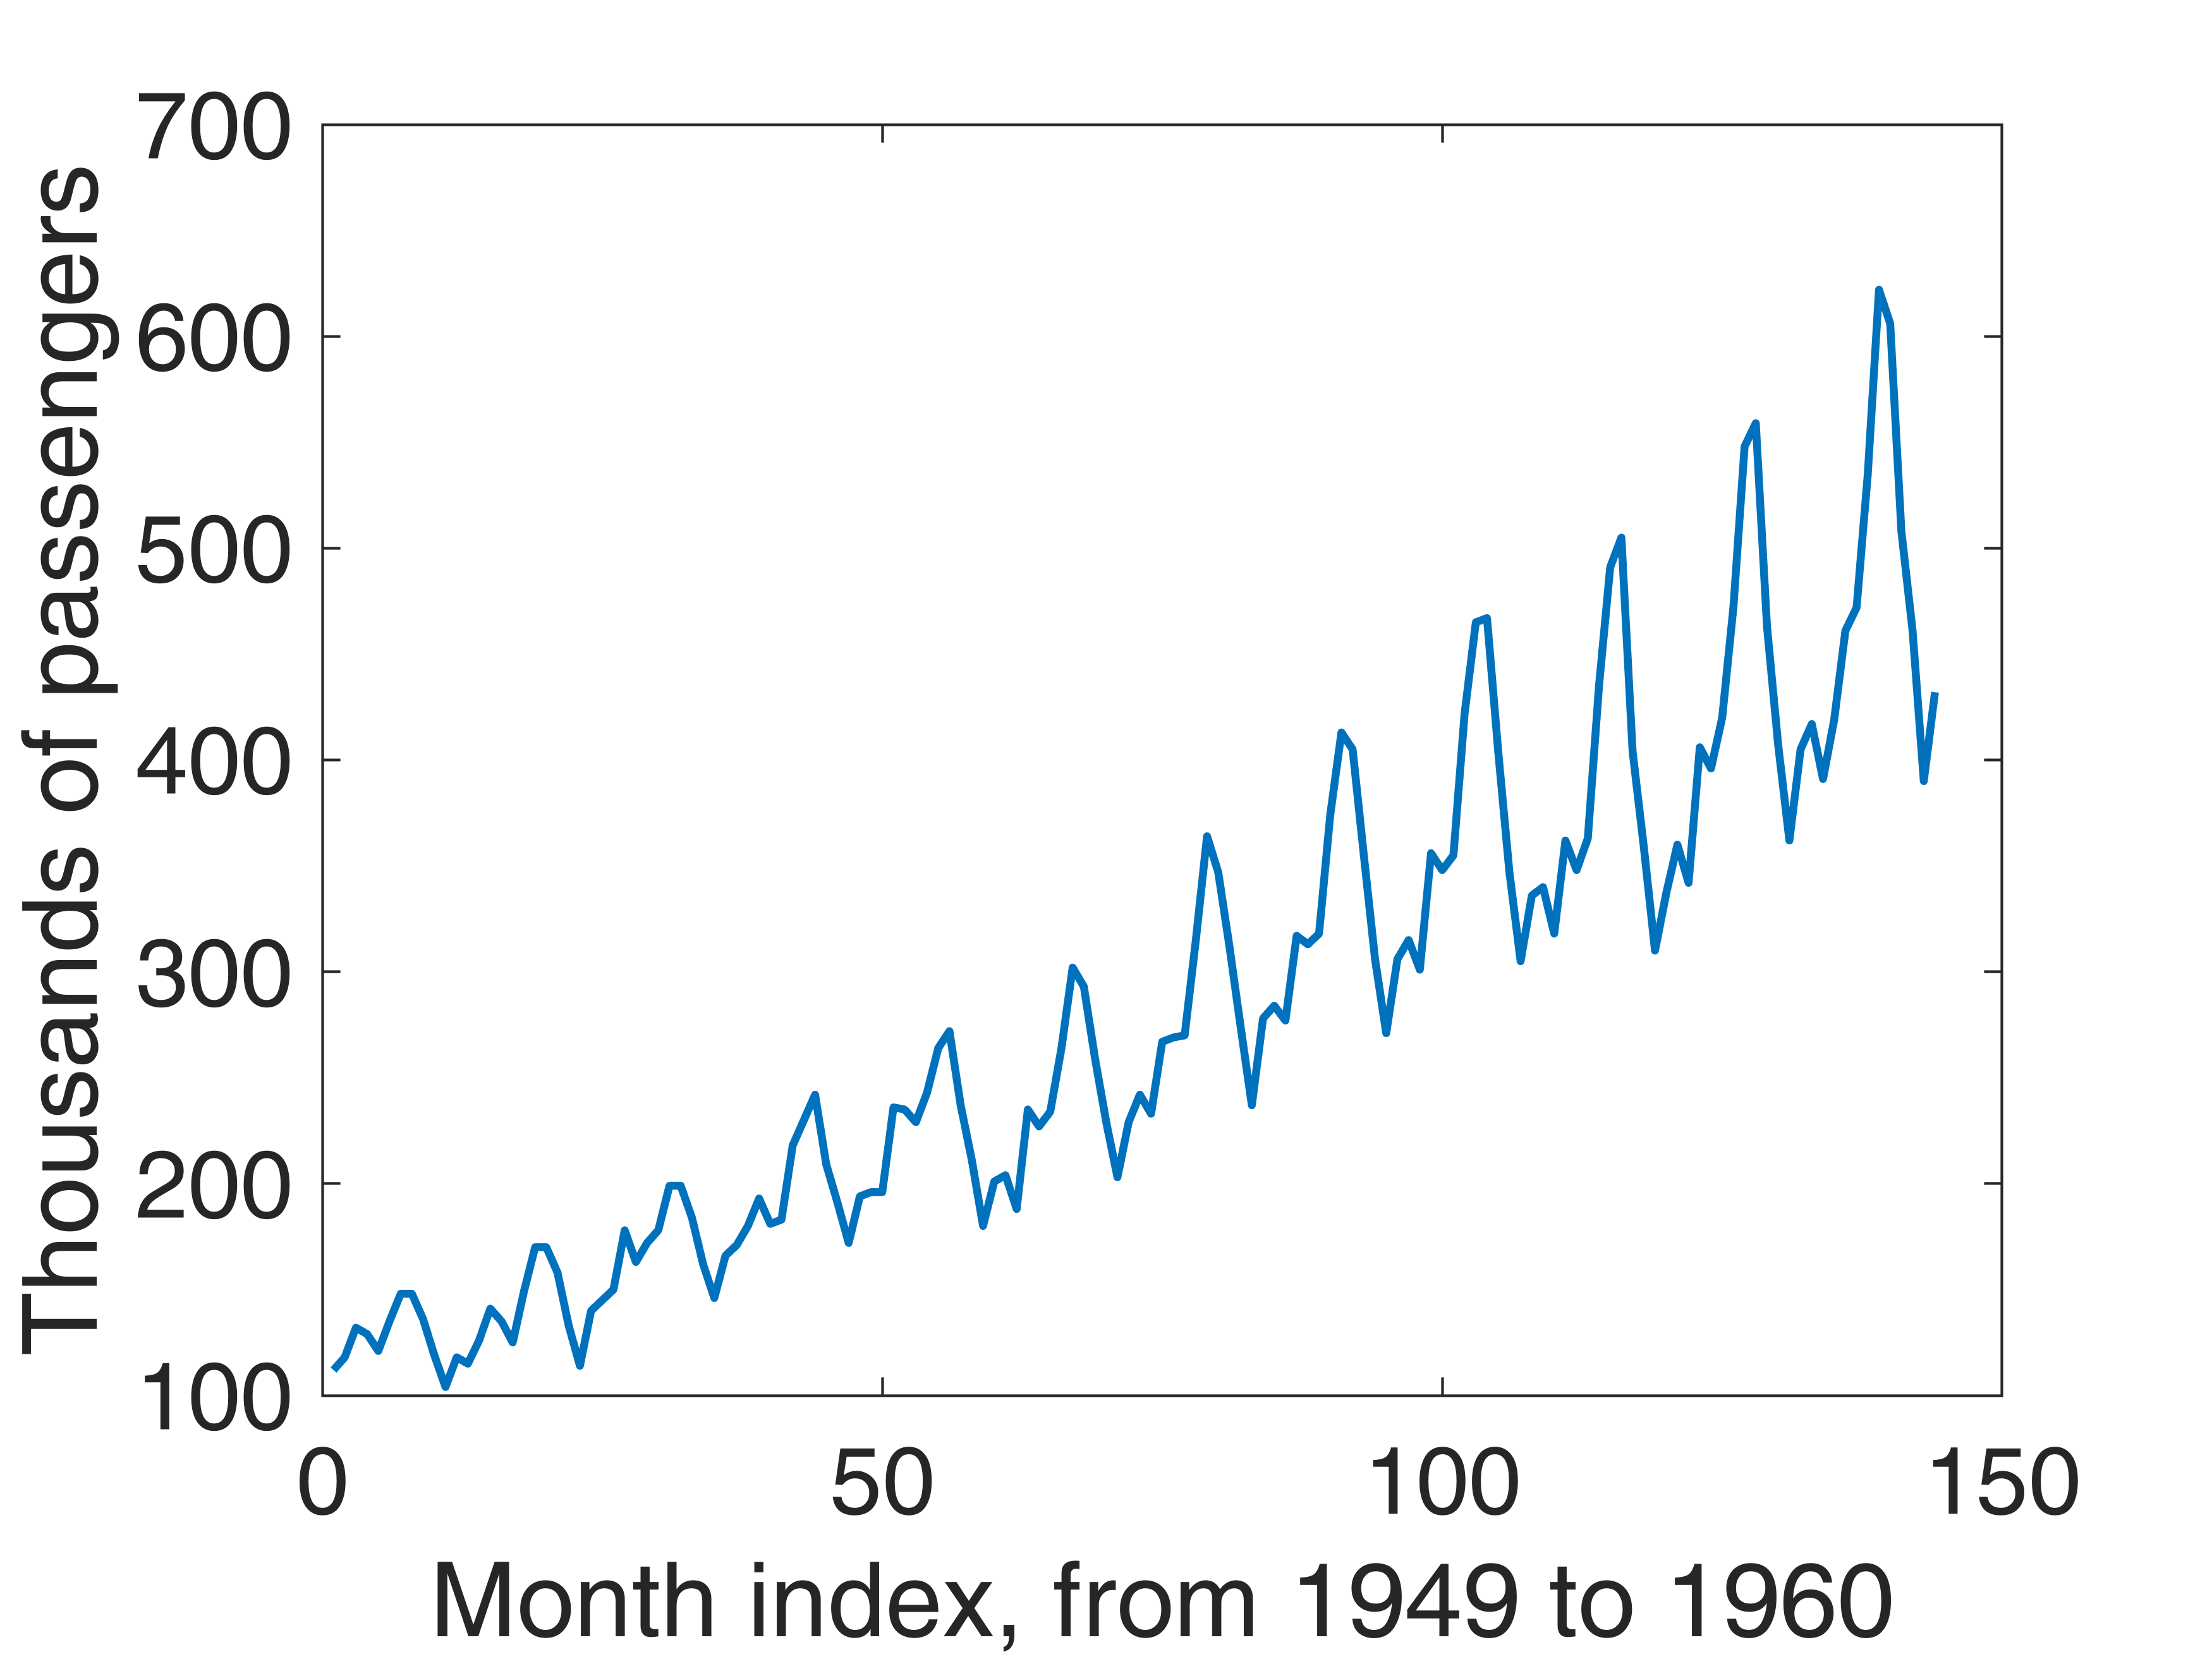

In [4]:
figure;
plot(airlines,'Linewidth',1.5);
xlabel('Month index, from 1949 to 1960','FontSize',18);
ylabel('Thousands of passengers','FontSize',18);
set(gca,'FontSize',18)

In [5]:
if prin ==1
    print -depsc ch8_ts_airline
else
    set(gcf,'Name', 'Figure 8.30 (left panel)');
    title('Figure 8.30 (left panel)')
end

Unrecognized function or variable 'prin'.

## Create right panel of Figure 8.30

In [6]:
figure;
plot(airlinesLS,'Linewidth',1.5);
hold on
yl = ylim; yaxlim = [yl(1) ; yl(2)];
line(LSpos*ones(2,1) , yaxlim , 'LineStyle' , ':' , 'LineWidth' , 2 , 'Color' , 'r');
text(LSpos , yaxlim(1) , num2str(LSpos) , 'Color' , 'r','FontSize',12 , 'HorizontalAlignment' , 'Center' , 'VerticalAlignment' ,  'Top');
text(UPpos , airlinesLS(UPpos) , ['+' num2str(200)] , 'Color' , 'r','FontSize',12, 'HorizontalAlignment' , 'Center', 'VerticalAlignment','Bottom');
text(UPpos   , airlinesLS(UPpos)   , '*' , 'Color' , 'r','FontSize',25, 'HorizontalAlignment' , 'Center');
text(DOWNpos , airlinesLS(DOWNpos) , '*' , 'Color' , 'r','FontSize',25, 'HorizontalAlignment' , 'Center');
text(round(median(DOWNpos)) , airlinesLS(round(median(DOWNpos))) , ['-' num2str(200)] , 'Color' , 'r','FontSize',12, 'HorizontalAlignment' , 'Center', 'VerticalAlignment','Top');
%text(DOWNpos , airlinesLS(DOWNpos) , ['-' num2str(200)] , 'Color' , 'r','FontSize',12, 'HorizontalAlignment' , 'Center', 'VerticalAlignment','Top');
%numpar = {'model parameters:' , 'A=1, B=2, G=1, $\delta_1=0$ '};
%title(gca,'Airline data','FontSize',20);
xlabel('Month index, from 1949 to 1960','FontSize',18);
ylabel('Thousands of passengers','FontSize',18);
set(gca,'FontSize',18)

if prin ==1
    print -depsc ch8_ts_airline_LScont
else
    set(gcf,'Name', 'Figure 8.30 (right panel)');
    title('Figure 8.30 (right panel)')
end

## Preapre input for Figure 8.31

the model


In [7]:
model           = struct;
model.trend     = 1;
model.seasonal  = 102;
model.s         = 12;
model.lshift    = LSpos-10:LSpos+10;

Y = airlinesLS;
titl = 'Airline data';
nT = length(Y);

## Create top left panel of Figure 8.31

The default value for h is 75 per cent of the data, i.e. 'h',round(nT\*0.75) This corresponds to a 25% breakdown point.


In [8]:
outLTS = LTSts(Y,'model',model,'plots',1,'conflev',0.99,'msg',0,'dispresults',true);
title(findobj(gcf,'Tag','LTSts:ts'),[titl ' - LTS with conflev=0.99 and bdp=25%'] );
if prin ==1
    print -depsc ch8_ts_airline_LTS
else
    set(gcf,'Name', 'Figure 8.31 (top left panel)');
    sgtitle('Figure 8.31 (top left panel)')
end
drawnow

## Create top right panel of Figure 8.31

this is LTsts with 5% bdp


In [9]:
outLTS05 = LTSts(Y,'model',model,'plots',1,'bdp',0.05,'conflev',0.99,'msg',0,'dispresults',true);
title(findobj(gcf,'Tag','LTSts:ts'),[titl ' - LTS with conflev=0.99 and bdp=5%'] );
if prin ==1
    print -depsc ch8_ts_airline_LTS_bdp05.eps
else
    set(gcf,'Name', 'Figure 8.31 (top right panel)');
    sgtitle('Figure 8.31 (top right panel)')
end
drawnow

## Create bottom left panel of Figure 8.31

wedgeplot for the LTSts


In [10]:
% the wedgeplot with the time series, the detected outliers and level shift
wedgeplot(outLTS,'titl',titl);
xlim([0,150])
if prin ==1
    print -depsc ch8_ts_airline_LTS_wedge.eps
else
    title('Figure 8.31 (bottom left panel)')
    set(gcf,"Name",'Figure 8.31 (bottom left panel)')
end

## Create bottom right panel of Figure 8.31

the wedgeplot with the time series, the detected outliers and level shift


In [11]:
wedgeplot(outLTS05,'titl',titl);
xlim([0,150])
if prin ==1
    print -depsc ch8_ts_airline_LTS_wedge_bdp05.eps
else
    title('Figure 8.31 (bottom right panel)')
    set(gcf,"Name",'Figure 8.31 (bottom right panel)')
end

## Create Figure 8.32

FS with default 0.99 conflev


In [12]:
outFSR = FSRts(Y,'model',model,'init',25,'plots',1,'msg',0);
title(findobj(gcf,'Tag','FSRts:ts'),[titl ' - FSR with default conflev (0.99)']);

pl_yX=findobj(0, 'type', 'figure','tag','fsr_yXplot');
close(pl_yX)

plres=findobj(0, 'type', 'figure','tag','pl_res');
figure(plres(end))
if prin ==1
    print -depsc  ch8_ts_airline_FS.eps
else
    sgtitle('Figure 8.32 (left panel)')
    set(gcf,"Name",'Figure 8.32 (left panel)')
end

aa=findobj(0, 'type', 'figure','tag','pl_fsr');
figure(aa(end))
if prin ==1
    print -depsc  ch8_ts_airline_FS_mdr.eps
else
    title('Figure 8.32 (right panel)')
    set(gcf,"Name",'Figure 8.32 (right panel)')
end
%InsideREADME